<a href="https://colab.research.google.com/github/iamatul1214/Tensorflow_Certification_Preparation/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We have 3 types of classifications
* Binary classification
* Multiple classification
* Multilabel classification

### creating data

In [266]:
## Making 1000 examples
from sklearn.datasets import make_circles

n_samples = 1000

## create circles
X,y = make_circles(n_samples, noise=0.03,random_state = 42)

In [267]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [268]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Our data is little hard to understand right now so let's visualize

In [269]:
import pandas as pd
circles = pd.DataFrame({"x0":X[:,0], "x1":X[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


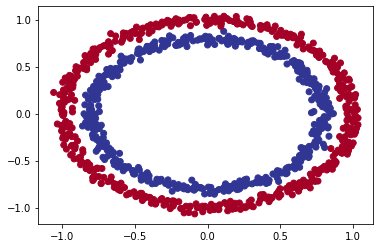

In [270]:
## visualizing with plots

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y ,cmap = plt.cm.RdYlBu);

### Let's create a simple model for our classification problem

In [271]:
## import tensorflow
import tensorflow as tf
tf.__version__

'2.8.2'

## Model 1

In [272]:
tf.random.set_seed(42)

## creating model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fitting the model

model_1.fit(X,y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4820


In [273]:
## Let's try to increase the epochs
model_1.fit(X,y ,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

### Model 2

In [274]:
tf.random.set_seed(42)

## model creation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

## compiling
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fitting
model_2.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9063 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4930
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4890
Epoch 11/

In [275]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4190


[0.6933411955833435, 0.4189999997615814]

### As we observed our accuracy hasn't improved at all, now we will try to create model in another format to see if it can help us.

## Model 3

In [276]:
tf.random.set_seed(42)

## model creation
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compiling
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fitting
model_3.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4900
Epoch 11/

### Model 4

In [277]:
tf.random.set_seed(42)

## model creation
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compiling
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## fitting
history = model_4.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5240
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5130
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5200
Epoch 11/

In [278]:
model_3.predict(X)

array([[0.49224496],
       [0.500575  ],
       [0.4994931 ],
       [0.49828207],
       [0.49012178],
       [0.49731138],
       [0.5027649 ],
       [0.49061623],
       [0.5069503 ],
       [0.49822176],
       [0.5095616 ],
       [0.510574  ],
       [0.500724  ],
       [0.48806655],
       [0.48903033],
       [0.49692628],
       [0.50479347],
       [0.49876413],
       [0.50315136],
       [0.5096258 ],
       [0.5018422 ],
       [0.49378797],
       [0.5004116 ],
       [0.49350667],
       [0.4943809 ],
       [0.49747354],
       [0.5053474 ],
       [0.48743266],
       [0.49536052],
       [0.48872322],
       [0.51042414],
       [0.49693298],
       [0.50337523],
       [0.484592  ],
       [0.50148165],
       [0.49293154],
       [0.49752393],
       [0.5113404 ],
       [0.4953518 ],
       [0.5017502 ],
       [0.5097852 ],
       [0.5071078 ],
       [0.50957793],
       [0.4865638 ],
       [0.5085134 ],
       [0.5052438 ],
       [0.49049038],
       [0.506

In [279]:
model_4.predict(X)

array([[9.72065330e-01],
       [9.66239929e-01],
       [8.62747312e-01],
       [9.39571023e-01],
       [3.11920941e-02],
       [9.13465381e-01],
       [9.45614994e-01],
       [9.66452003e-01],
       [8.71854007e-01],
       [1.12820864e-02],
       [8.09763551e-01],
       [1.94974840e-02],
       [8.68484139e-01],
       [9.67295885e-01],
       [8.05553079e-01],
       [9.23677325e-01],
       [5.85785210e-02],
       [9.13223028e-01],
       [8.55380177e-01],
       [1.74482197e-01],
       [9.85619187e-01],
       [2.20806003e-02],
       [4.04076576e-02],
       [9.77168202e-01],
       [8.47433805e-02],
       [1.64736390e-01],
       [3.48224938e-02],
       [7.97575712e-01],
       [8.76131892e-01],
       [9.61483240e-01],
       [1.52003229e-01],
       [1.96228921e-02],
       [9.58087802e-01],
       [2.39834189e-03],
       [6.17998838e-03],
       [1.83573365e-02],
       [9.34751630e-01],
       [9.15518045e-01],
       [9.21657443e-01],
       [5.74185848e-02],


### To visualize our model predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take a trained model, X,Y
* Create meshgrid of different X values
* Make predictions across meshgrids
* Plot the predictions as well as a line between zones (where each unique class falls) 

In [280]:
import numpy as np

In [281]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """ 
  Plots a decision boundary created by a model predicting on X.
  """
  # Define the axis boundary of plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min,y_max,100))
  
  ## create x values as we are going to make predictions on these
  x_in = np.c_[xx.ravel(), yy.ravel()]

  ## make predictions
  y_pred = model.predict(x_in)

  ## check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


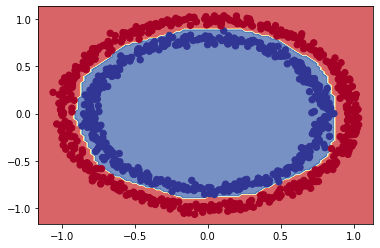

In [282]:
plot_decision_boundary(model_4,X,y) 

## We observed that the boundary has been calculated perfectly and that's why we received the best accuracy

doing binary classification


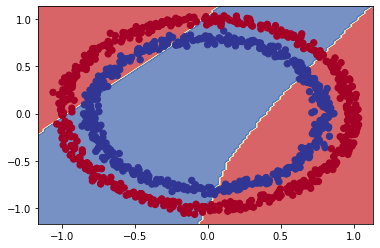

In [283]:
## checking on model_3

plot_decision_boundary(model_3,X,y)

doing binary classification


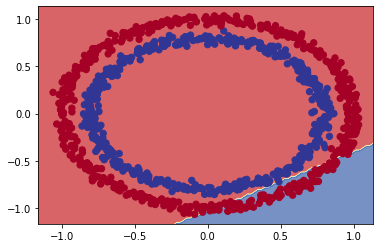

In [284]:
plot_decision_boundary(model_2,X,y)

doing binary classification


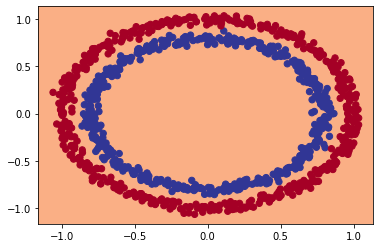

In [285]:
plot_decision_boundary(model_1,X,y)

doing binary classification


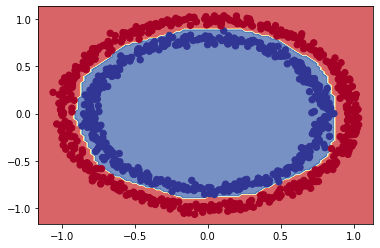

In [286]:
plot_decision_boundary(model_4,X,y)

In [287]:
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min,y_max,100))

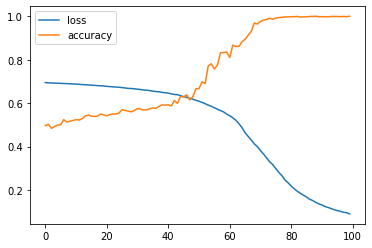

In [288]:
import pandas as pd
pd.DataFrame(history.history).plot()


In [289]:
history.history

{'loss': [0.6944710612297058,
  0.6935732364654541,
  0.6927604079246521,
  0.6922218799591064,
  0.6916939616203308,
  0.6912038922309875,
  0.6904160976409912,
  0.6898316144943237,
  0.6889241337776184,
  0.6882691979408264,
  0.6874390840530396,
  0.6865603923797607,
  0.6855806708335876,
  0.6846044659614563,
  0.6836192607879639,
  0.682595431804657,
  0.681826114654541,
  0.6806650161743164,
  0.6798739433288574,
  0.6786636114120483,
  0.6773961782455444,
  0.6762107610702515,
  0.6749440431594849,
  0.6741687059402466,
  0.672987699508667,
  0.671523928642273,
  0.6697941422462463,
  0.6676652431488037,
  0.6673234105110168,
  0.6657484173774719,
  0.6641712784767151,
  0.6627783179283142,
  0.6604337096214294,
  0.6597973108291626,
  0.6575716733932495,
  0.6552436947822571,
  0.6534525156021118,
  0.6521438956260681,
  0.6493985652923584,
  0.6479238867759705,
  0.6460734009742737,
  0.6425811648368835,
  0.6398378610610962,
  0.6389680504798889,
  0.6341378092765808,
  0.62

In [290]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]
X_test.shape,y_test.shape,X_train.shape

((200, 2), (200,), (800, 2))

## Model 5: Just changing the learning rate taking lower value and expecting faster convergence

In [291]:
tf.random.set_seed(42)

## model creation
model_5 = tf.keras.Sequential([
    # tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compiling
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['accuracy'])

## fitting
history = model_5.fit(X_train,y_train, epochs = 10)

Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5913
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6313
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6263
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.8500
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.8838
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.9538
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.9675
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9812
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9925
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9962


In [292]:
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 1.0000


[0.11261779069900513, 1.0]

doing binary classification
doing binary classification


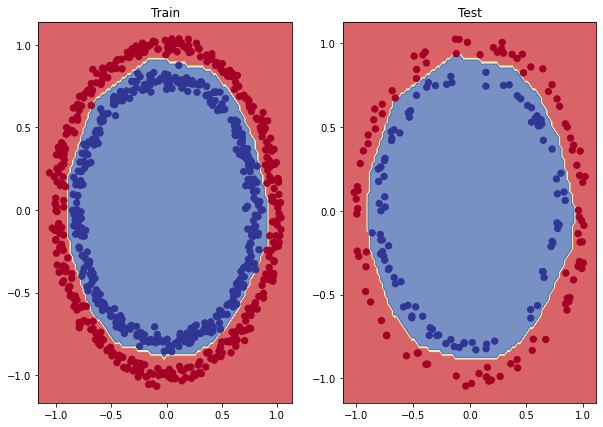

In [293]:
### PLotting the decision boundaries for training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5,X_test,y_test)
plt.show()


## Let's check how can we find the best learning rate hyperparameter value if we use various learning rate values. We will use callbacks here to find so..

In [294]:
tf.random.set_seed(42)
## creating model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compiling the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


## creating a learning rate call back scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

## fitting the model
history_6 = model_6.fit(X_train,y_train, epochs = 100, callbacks = [lr_scheduler_callback])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [295]:
history_6.history

{'loss': [0.6907462477684021,
  0.6903165578842163,
  0.689871072769165,
  0.6894283890724182,
  0.6889661550521851,
  0.6884222626686096,
  0.687852680683136,
  0.6872915625572205,
  0.6866781711578369,
  0.6859883666038513,
  0.6853207349777222,
  0.684654712677002,
  0.6836681365966797,
  0.6827942132949829,
  0.6818581223487854,
  0.6805810332298279,
  0.6795085072517395,
  0.6778706908226013,
  0.67645263671875,
  0.6745920777320862,
  0.672627329826355,
  0.6702865362167358,
  0.6678019762039185,
  0.6644271016120911,
  0.6605376601219177,
  0.6553805470466614,
  0.6494726538658142,
  0.6406269669532776,
  0.6303807497024536,
  0.6124093532562256,
  0.5935633778572083,
  0.5683993697166443,
  0.5268964767456055,
  0.4723395109176636,
  0.4060676097869873,
  0.3487296402454376,
  0.2569054961204529,
  0.20225490629673004,
  0.15589559078216553,
  0.11599300056695938,
  0.0894802063703537,
  0.06133072078227997,
  0.04984258487820625,
  0.057169560343027115,
  0.02988295629620552,


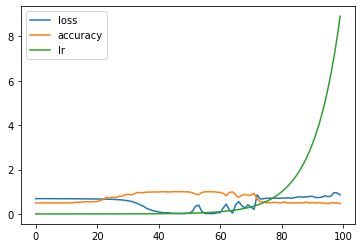

In [296]:
pd.DataFrame(history_6.history).plot()

##  Let's try to target the loss against the different values of learning rates. For this we will try to create a plot of loss vs lr. Let's calculate learning rate as we already know the epoch value and we know the loss value for each epoch as well.

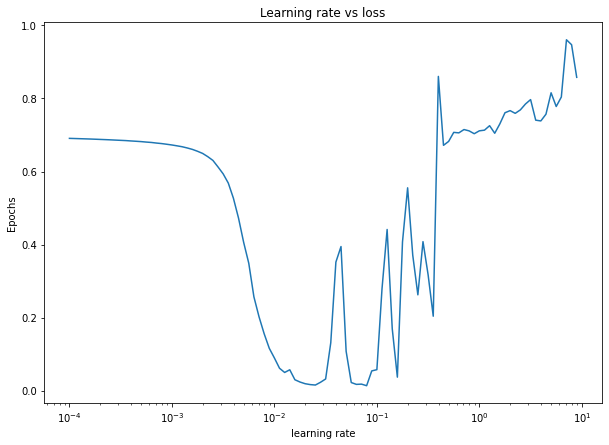

In [297]:
## creating the lr values-
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_6.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("Epochs")
plt.title("Learning rate vs loss")
plt.show()

### From above looks like the learning rate is lowest when the value of lr is around 0.01 and surprisingly when we used 0.01 then we got better accuracy and good convergence as well. But let's create one more with lr=0.02 and check what is the progress.

In [298]:
tf.random.set_seed(42)

##model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compiling the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ['accuracy'])

## fitting the model

history_7 = model_7.fit(X_train,y_train,epochs = 20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6771 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6450
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8175
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.9463
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9850
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9912
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9962
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9987
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9937
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9987
Epoch 11/20
25/25 [

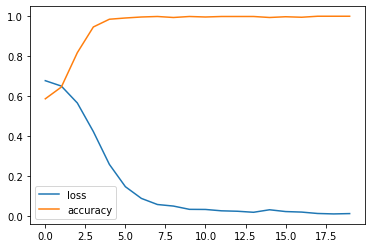

In [299]:
pd.DataFrame(history_7.history).plot()

In [300]:
## Let's evaluate on the test set
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9950


[0.020870916545391083, 0.9950000047683716]

In [301]:
y_pred = model_7.predict(X_test)
y_pred

array([[9.97288167e-01],
       [9.99920845e-01],
       [9.99597192e-01],
       [9.99620199e-01],
       [5.82917631e-02],
       [6.23613596e-04],
       [9.88717437e-01],
       [8.82335225e-05],
       [9.99867201e-01],
       [3.90768051e-03],
       [9.98342454e-01],
       [1.27125978e-01],
       [9.98982251e-01],
       [9.98595595e-01],
       [9.99632597e-01],
       [9.99618173e-01],
       [9.99816477e-01],
       [9.99199152e-01],
       [5.41955233e-04],
       [9.97681081e-01],
       [3.68177891e-04],
       [9.99426901e-01],
       [9.99460876e-01],
       [9.99330044e-01],
       [7.31796026e-04],
       [9.83532667e-01],
       [9.99611497e-01],
       [7.39341974e-03],
       [1.78068876e-04],
       [9.99630213e-01],
       [1.84446573e-04],
       [9.99489307e-01],
       [9.99590278e-01],
       [8.79913568e-04],
       [1.12097442e-01],
       [9.99541223e-01],
       [9.97640729e-01],
       [9.99772072e-01],
       [9.99717116e-01],
       [9.99666274e-01],


In [302]:
## Let's try to create a confusion matrix
from sklearn.metrics import confusion_matrix

try:
  ## making confusion matrix
  confusion_matrix(y_test,y_pred)
except Exception as e:
  print(f" Looks like there is some error in our confusion matrix---->> \n {e}")

 Looks like there is some error in our confusion matrix---->> 
 Classification metrics can't handle a mix of binary and continuous targets


### So the problem is our prediciton is storing the probabilites whereas y_test stories the classes, so let's assume by default threshold of 0.5 and round off the y_pred values.

In [303]:
tf.round(y_pred)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [304]:
cm_binary = confusion_matrix(y_test,tf.round(y_pred))
cm_binary

array([[100,   1],
       [  0,  99]])

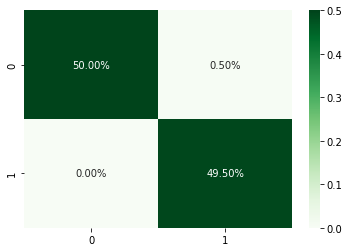

In [118]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot = True, fmt='.2%', cmap='Greens')

Text(0.5, 51.0, 'predicted labels')

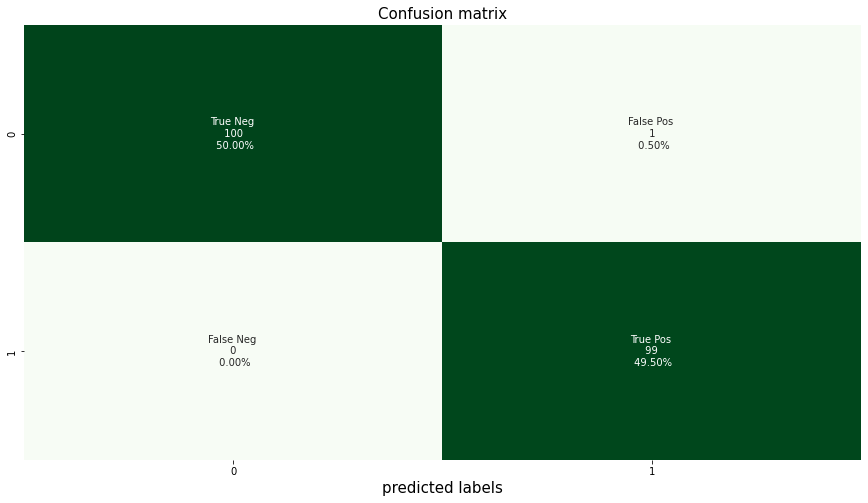

In [119]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentage = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
group_count = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1} \n {v2} \n {v3}" for v1, v2, v3 in zip(group_names,group_count,group_percentage)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (15,8))
plt.title("Confusion matrix", fontsize = 15)
s = sns.heatmap(cm/np.sum(cm), annot = labels, fmt='', cmap='Greens', cbar=False)
# s.set(xlabel='Prediction', ylabel='Actual')
plt.xlabel("predicted labels", fontsize=15)

## creating my own function to plot the confusion matrix using heatmap

In [120]:
def plot_cm_using_heat_map(confusion_matrix, cbar = False, class_names = ["True Negative","False Positive","False Negative","True Positive"],color = 'Blues', plot_size=(10,8), plot_title="Confusion matrix"):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np
  
  group_percentage = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
  group_count = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
  labels = [f"{v1} \n {v2} \n {v3}" for v1, v2, v3 in zip(class_names,group_count,group_percentage)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=plot_size)
  plt.title(plot_title, fontsize=((plot_size[0]+plot_size[1])/2)+3)
  s = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot = labels, fmt='', cmap=color, cbar=cbar)
  plt.xlabel("Predicted label", fontsize=((plot_size[0]+plot_size[1])/2)+3)
  plt.ylabel("Actual label", fontsize=((plot_size[0]+plot_size[1])/2)+3)

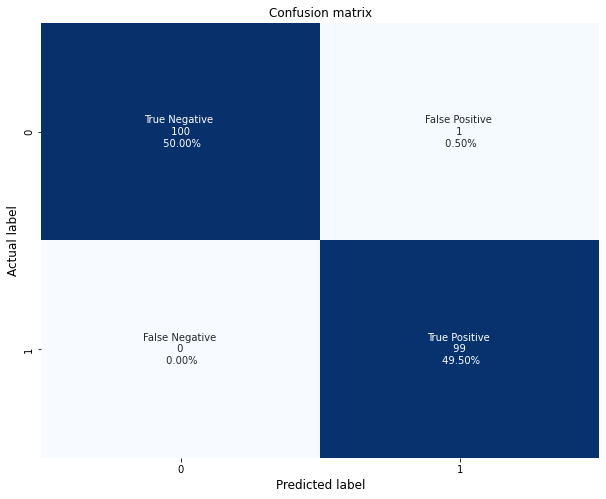

In [121]:
plot_cm_using_heat_map(cm)

In [122]:
cm

array([[100,   1],
       [  0,  99]])

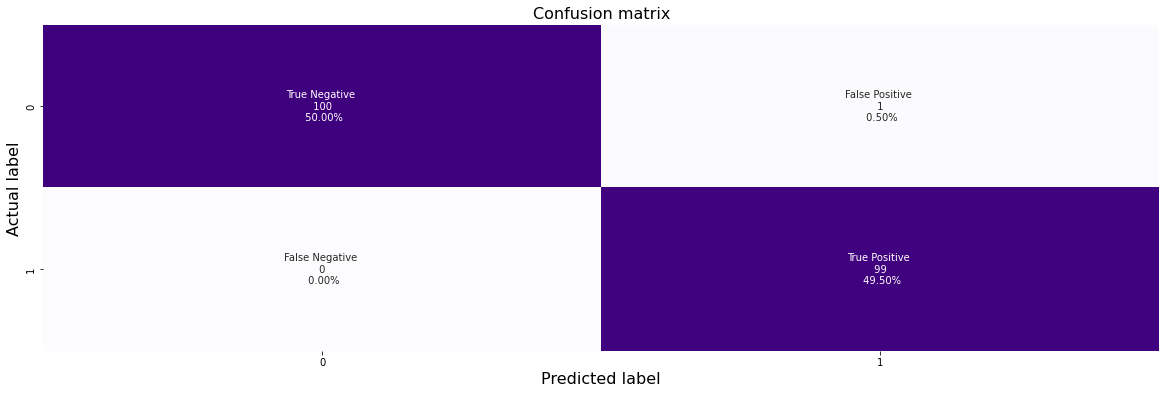

In [123]:
plot_cm_using_heat_map(cm, color='Purples', plot_size=(20,6))

In [124]:
plot_size=(10,8) 
plot_size[1]

8

### Now let's try a multiclass classfication problem. (IRIS dataset)

In [305]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [306]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [307]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [308]:
df.shape

(150, 5)

In [309]:
dict_vals = {'Setosa':0,'Versicolor':1,'Virginica':2}

In [310]:
df['variety'] = df['variety'].replace(dict_vals)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [311]:
X = df.drop('variety', axis=1)
y = df['variety']

In [312]:
X_train,X_test,y_train,y_test = train_test_split( X, y,test_size = 0.2, shuffle=True, random_state=42 )
X_train.shape,X_test.shape,y_train.shape

((120, 4), (30, 4), (120,))

In [313]:
X_train.head(5),y_train.head(5)

(    sepal.length  sepal.width  petal.length  petal.width
 22           4.6          3.6           1.0          0.2
 15           5.7          4.4           1.5          0.4
 65           6.7          3.1           4.4          1.4
 11           4.8          3.4           1.6          0.2
 42           4.4          3.2           1.3          0.2, 22    0
 15    0
 65    1
 11    0
 42    0
 Name: variety, dtype: int64)

In [314]:
## creating a sample model
model_sample = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')

])

## compiling
model_sample.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

## fitting the model
model_sample_history = model_sample.fit(X_train, y_train, epochs = 10, validation_data=(X_test,y_test))

Epoch 1/10
4/4 [==============================] - 1s 58ms/step - loss: 2.1973 - accuracy: 0.3333 - val_loss: 2.3242 - val_accuracy: 0.3333
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 2.0701 - accuracy: 0.3333 - val_loss: 2.1958 - val_accuracy: 0.3333
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 1.9547 - accuracy: 0.3333 - val_loss: 2.0814 - val_accuracy: 0.3333
Epoch 4/10
4/4 [==============================] - 0s 10ms/step - loss: 1.8520 - accuracy: 0.5833 - val_loss: 1.9804 - val_accuracy: 0.6333
Epoch 5/10
4/4 [==============================] - 0s 10ms/step - loss: 1.7644 - accuracy: 0.6750 - val_loss: 1.8970 - val_accuracy: 0.6333
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 1.6952 - accuracy: 0.6750 - val_loss: 1.8297 - val_accuracy: 0.6333
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 1.6395 - accuracy: 0.6750 - val_loss: 1.7645 - val_accuracy: 0.6333
Epoch 8/10
4/4 [===========

### Now let's try the same model architecture with the dataset normalized

In [315]:
### Let's first standardize the dataset and check
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_standardized = scale.transform(X_train)
X_train_standardized

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [316]:
X_test_standardized = scale.transform(X_test)
X_test_standardized

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751],
       [ 0.84210448,  0.30929911,  0.78699794,  1.09012776],
       [-1.23014297, -0.13788033, -1.33331205, -1.44608785],
       [-0.37686461,  0.98006827, -1.39061772, -1.31260282],
       [-1.10824606,  0.08570939, -1.27600637, -1.44608785],
       [-0.86445224,  1.65083742, -1.27600637, -1.17911778],
       [ 0.59831066,  0.53288883,  0.55777524,  0.55618763],
       [ 0.84210448, -0.

### Creating model for the standardized dataset

In [317]:
model_sample.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 10)                50        
                                                                 
 dense_161 (Dense)           (None, 10)                110       
                                                                 
 dense_162 (Dense)           (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [318]:
### CREATING MODEL

model_standardized = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
    ])

## compiling the model

model_standardized.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

## fitting the model
model_standardized_history = model_standardized.fit(X_train_standardized, y_train, epochs = 10, validation_data = (X_test_standardized, y_test))

Epoch 1/10
4/4 [==============================] - 1s 58ms/step - loss: 1.3682 - accuracy: 0.3000 - val_loss: 1.3602 - val_accuracy: 0.3000
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 1.3318 - accuracy: 0.3083 - val_loss: 1.3281 - val_accuracy: 0.3000
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 1.3020 - accuracy: 0.3083 - val_loss: 1.2972 - val_accuracy: 0.3000
Epoch 4/10
4/4 [==============================] - 0s 10ms/step - loss: 1.2728 - accuracy: 0.3000 - val_loss: 1.2687 - val_accuracy: 0.3000
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 1.2460 - accuracy: 0.3000 - val_loss: 1.2423 - val_accuracy: 0.3000
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 1.2213 - accuracy: 0.2917 - val_loss: 1.2178 - val_accuracy: 0.3333
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 1.1977 - accuracy: 0.3000 - val_loss: 1.1944 - val_accuracy: 0.3333
Epoch 8/10
4/4 [===========

## Let's plot the history of both the models and check

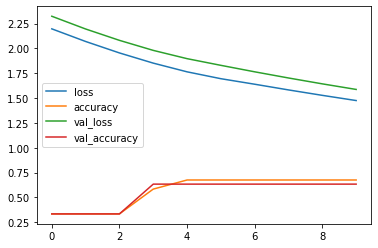

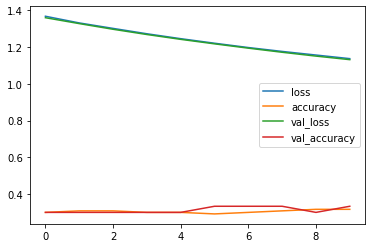

In [319]:
pd.DataFrame(model_sample_history.history).plot()
pd.DataFrame(model_standardized_history.history).plot()

### Let's create another model with some changed neurons and callback to find the best learning rate

In [320]:
## model creation
model_stand_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

## compiling

model_stand_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

## lr and early stopping callback
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler( lambda epoch : 1e-3 * 10**(epoch/20))
early_stop_training = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=5)


model_stand_1_history = model_stand_1.fit(X_train_standardized, y_train, epochs = 50, callbacks=[learning_rate_scheduler,early_stop_training], validation_data=(X_test_standardized,y_test))

Epoch 1/50
4/4 [==============================] - 1s 55ms/step - loss: 1.2401 - accuracy: 0.2083 - val_loss: 1.2789 - val_accuracy: 0.2333 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 1.2269 - accuracy: 0.2250 - val_loss: 1.2604 - val_accuracy: 0.2667 - lr: 0.0011
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 1.2129 - accuracy: 0.2583 - val_loss: 1.2399 - val_accuracy: 0.2667 - lr: 0.0013
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1974 - accuracy: 0.2667 - val_loss: 1.2169 - val_accuracy: 0.3667 - lr: 0.0014
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1806 - accuracy: 0.2750 - val_loss: 1.1933 - val_accuracy: 0.4000 - lr: 0.0016
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 1.1641 - accuracy: 0.3583 - val_loss: 1.1679 - val_accuracy: 0.4333 - lr: 0.0018
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 1.1470 - accuracy

Text(0.5, 1.0, 'Leraning rate vs loss')

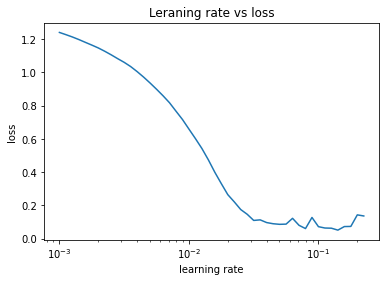

In [321]:
## Let;s plot and check which is the best lr
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(44)/20))  ## if lr is not present in history object
plt.semilogx(model_stand_1_history.history['lr'], model_stand_1_history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Leraning rate vs loss")

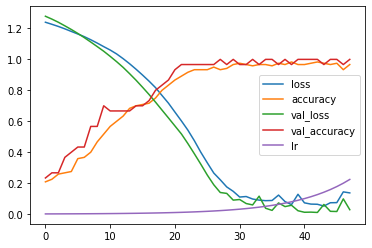

In [322]:
pd.DataFrame(model_stand_1_history.history).plot()

In [323]:
y_probs = model_stand_1.predict(X_test_standardized)
labels = tf.argmax(y_probs[0])
labels.numpy()

1

In [324]:
class_labels = {v:k for k,v in dict_vals.items()}
class_labels

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [325]:
y_probs = model_stand_1.predict(X_test_standardized)
labels = tf.argmax(y_probs[2])
class_labels[labels.numpy()]

'Virginica'

In [326]:
## checking the prediction for top 10 results
predicted_list_num = []
predicted_list_class = []
for i in range(len(y_test)):
  labels = tf.argmax(y_probs[i])
  predicted_list_num.append(labels)
  predicted_list_class.append(class_labels[labels.numpy()])
  print(f"prediction for {i} is : {class_labels[labels.numpy()]}")

prediction for 0 is : Versicolor
prediction for 1 is : Setosa
prediction for 2 is : Virginica
prediction for 3 is : Versicolor
prediction for 4 is : Versicolor
prediction for 5 is : Setosa
prediction for 6 is : Versicolor
prediction for 7 is : Virginica
prediction for 8 is : Versicolor
prediction for 9 is : Versicolor
prediction for 10 is : Virginica
prediction for 11 is : Setosa
prediction for 12 is : Setosa
prediction for 13 is : Setosa
prediction for 14 is : Setosa
prediction for 15 is : Versicolor
prediction for 16 is : Virginica
prediction for 17 is : Versicolor
prediction for 18 is : Versicolor
prediction for 19 is : Virginica
prediction for 20 is : Setosa
prediction for 21 is : Virginica
prediction for 22 is : Setosa
prediction for 23 is : Virginica
prediction for 24 is : Virginica
prediction for 25 is : Virginica
prediction for 26 is : Virginica
prediction for 27 is : Virginica
prediction for 28 is : Setosa
prediction for 29 is : Setosa


In [327]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test,y_pred = predicted_list_num)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

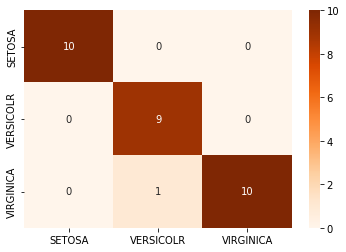

In [328]:
sns.heatmap(cm_df, cmap="Oranges", annot=True)

In [329]:
def plot_cm_using_heat_map(confusion_matrix, cbar = False, class_names = ["True Negative","False Positive","False Negative","True Positive"],color = 'Blues', plot_size=(10,8), plot_title="Confusion matrix"):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np
  
  if "DataFrame" in str(type(confusion_matrix)):
    confusion_matrix_numpy = confusion_matrix.to_numpy()
  else:
    confusion_matrix_numpy = confusion_matrix
    
  group_percentage = ["{0:.2%}".format(value) for value in confusion_matrix_numpy.flatten()/np.sum(confusion_matrix_numpy)]
  group_count = ["{0:0.0f}".format(value) for value in confusion_matrix_numpy.flatten()]
  if confusion_matrix.size <= 4:
    labels = [f"{v1} \n {v2} \n {v3}" for v1, v2, v3 in zip(class_names,group_count,group_percentage)]
    labels = np.asarray(labels).reshape(2,2)
  else:
    labels = [f"{v1} \n {v2}" for v1, v2 in zip(group_count,group_percentage)]
    label_size = int(np.sqrt(len(group_count)))
    labels = np.asarray(labels).reshape(label_size,label_size)

  plt.figure(figsize=plot_size)
  plt.title(plot_title, fontsize=((plot_size[0]+plot_size[1])/2)+3)
  s = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot = labels, fmt='', cmap=color, cbar=cbar)
  plt.xlabel("Predicted label", fontsize=((plot_size[0]+plot_size[1])/2)+3)
  plt.ylabel("Actual label", fontsize=((plot_size[0]+plot_size[1])/2)+3)

In [245]:
group_percentage = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
group_count = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1} \n {v2}" for v1, v2, in zip(group_count,group_percentage)]
# labels = np.asarray(labels).reshape(2,2)
group_percentage, group_count, labels
label_size = int(np.sqrt(len(group_percentage)))
label_size

3

In [261]:

if "DataFrame" in str(type(cm_df)):
  print("yes")
else:
  print("No")

yes


In [220]:
class_names = ["True Negative","False Positive","False Negative","True Positive"]

In [225]:
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,10,0,0
VERSICOLR,0,9,0
VIRGINICA,0,1,10


(None, None)

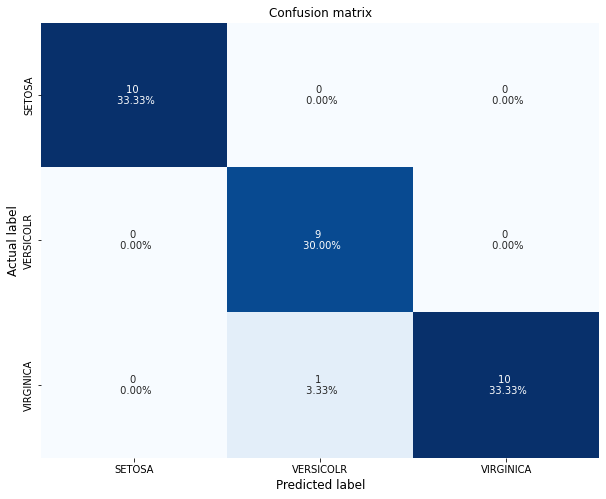

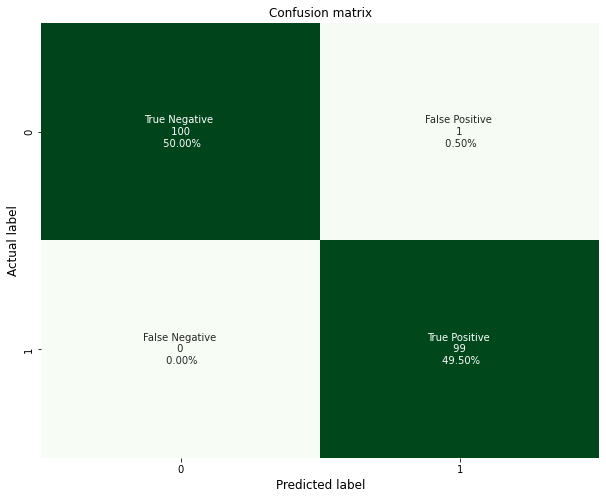

In [331]:
plot_cm_using_heat_map(cm_df), plot_cm_using_heat_map(cm_binary, color="Greens")

In [224]:
class_labels

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

### Let's check the layers of our recent model and then we will look into weights and biases of each layer

In [332]:
model_stand_1.layers

In [335]:
model_stand_1.layers[0]

In [336]:
model_stand_1.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 4)                 20        
                                                                 
 dense_167 (Dense)           (None, 8)                 40        
                                                                 
 dense_168 (Dense)           (None, 3)                 27        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [341]:
model_stand_1.layers[0].weights

[<tf.Variable 'dense_166/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.5211959 ,  0.1903263 , -0.36189693, -1.5308579 ],
        [ 0.13030688, -0.02688621, -0.16878653,  1.8060962 ],
        [ 1.8741703 ,  0.77504504,  0.02598401,  0.05349594],
        [ 1.8170584 ,  0.88564134,  0.76704115, -0.48235497]],
       dtype=float32)>,
 <tf.Variable 'dense_166/bias:0' shape=(4,) dtype=float32, numpy=array([-0.8846542, -0.8235204,  0.4428835,  1.0247808], dtype=float32)>]

In [348]:
weights, biases = model_stand_1.layers[0].get_weights()
weights, weights.shape

(array([[-0.5211959 ,  0.1903263 , -0.36189693, -1.5308579 ],
        [ 0.13030688, -0.02688621, -0.16878653,  1.8060962 ],
        [ 1.8741703 ,  0.77504504,  0.02598401,  0.05349594],
        [ 1.8170584 ,  0.88564134,  0.76704115, -0.48235497]],
       dtype=float32), (4, 4))

In [349]:
biases, biases.shape

(array([-0.8846542, -0.8235204,  0.4428835,  1.0247808], dtype=float32), (4,))

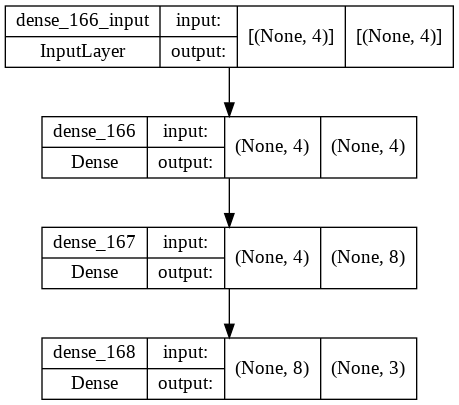

In [351]:
from tensorflow.keras.utils import plot_model
plot_model(model_stand_1, show_shapes = True)